<a href="https://colab.research.google.com/github/ArkoOf22/ArkoOf22/blob/main/Chapter8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage.transform import (hough_line, hough_line_peaks, hough_circle, hough_circle_peaks)
from skimage.draw import circle_perimeter
from skimage.feature import canny
from skimage.data import astronaut
from skimage.io import imread, imsave
from skimage.color import rgb2gray, gray2rgb, label2rgb
from skimage import img_as_float
from skimage.morphology import skeletonize
from skimage import data, img_as_float
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.filters import sobel, threshold_otsu
from skimage.feature import canny
from skimage.segmentation import felzenszwalb, slic, quickshift, watershed
from skimage.segmentation import mark_boundaries, find_boundaries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


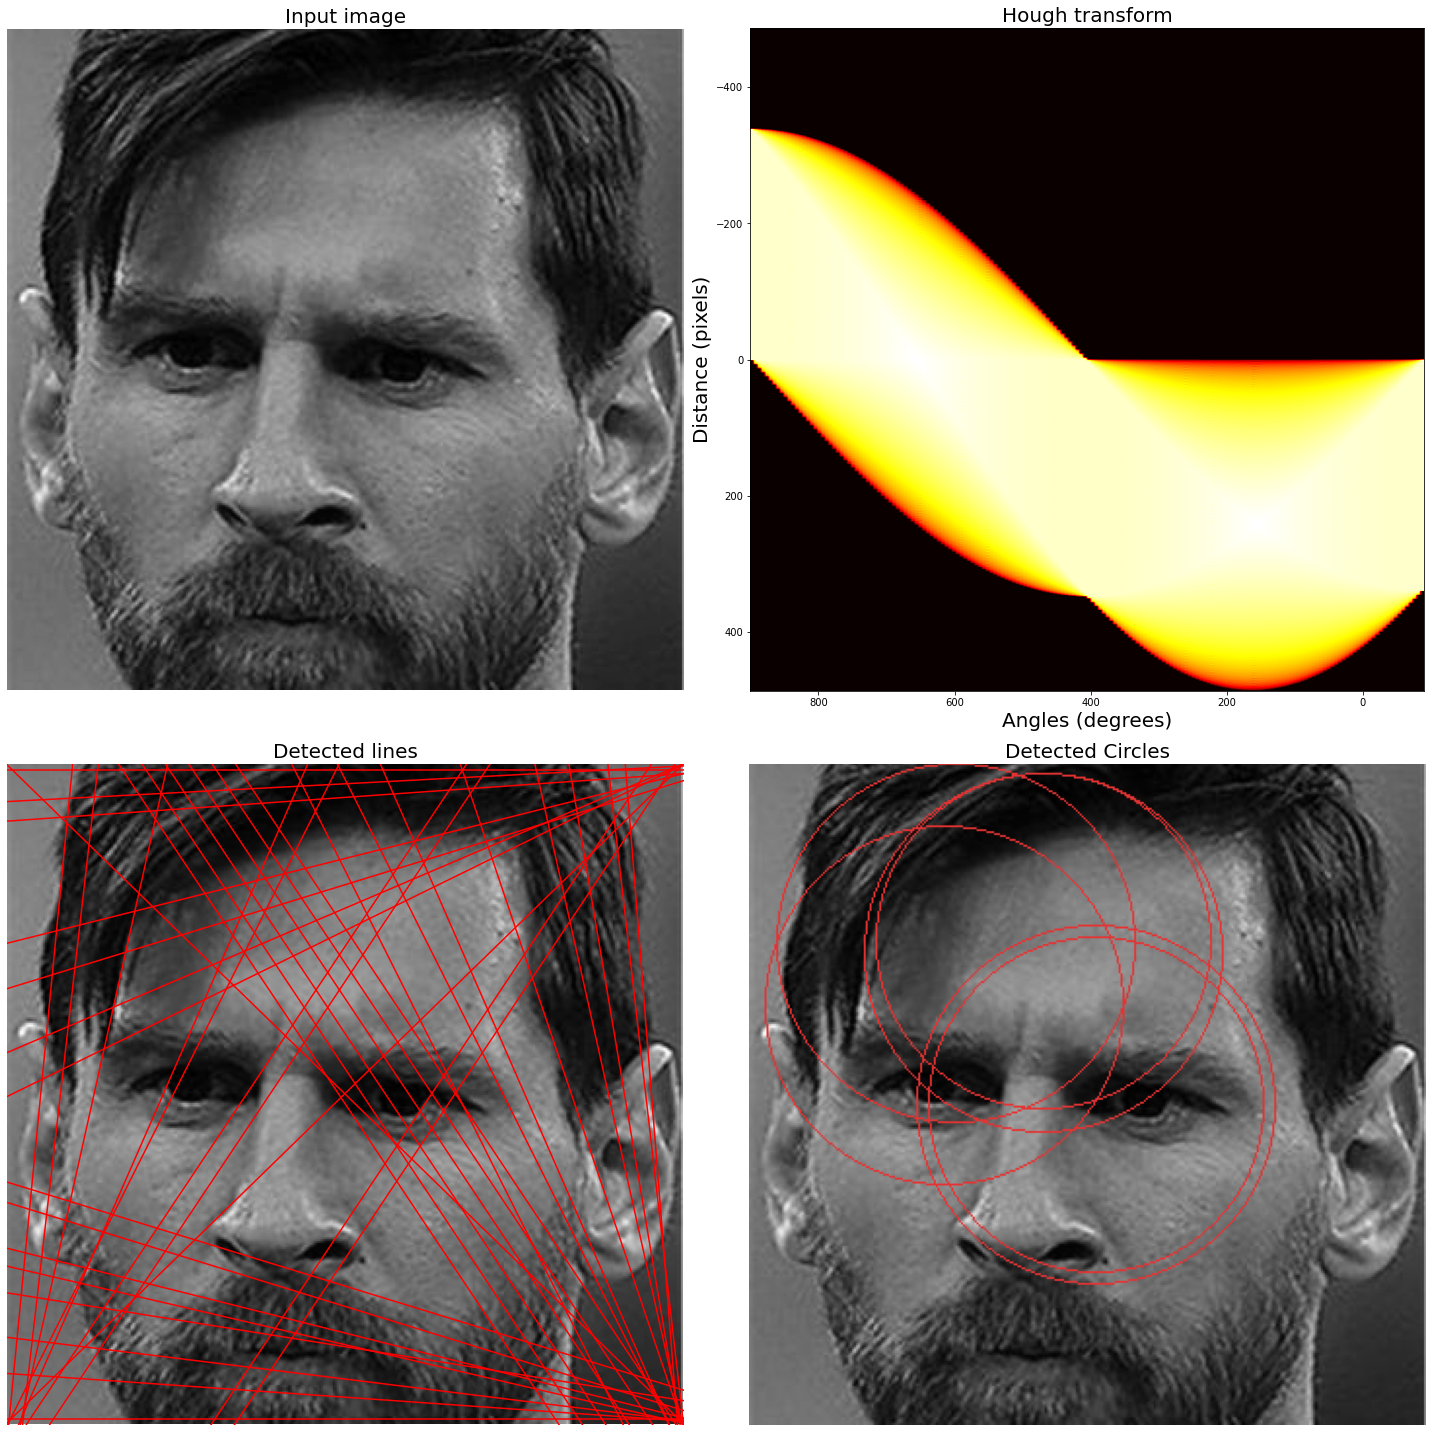

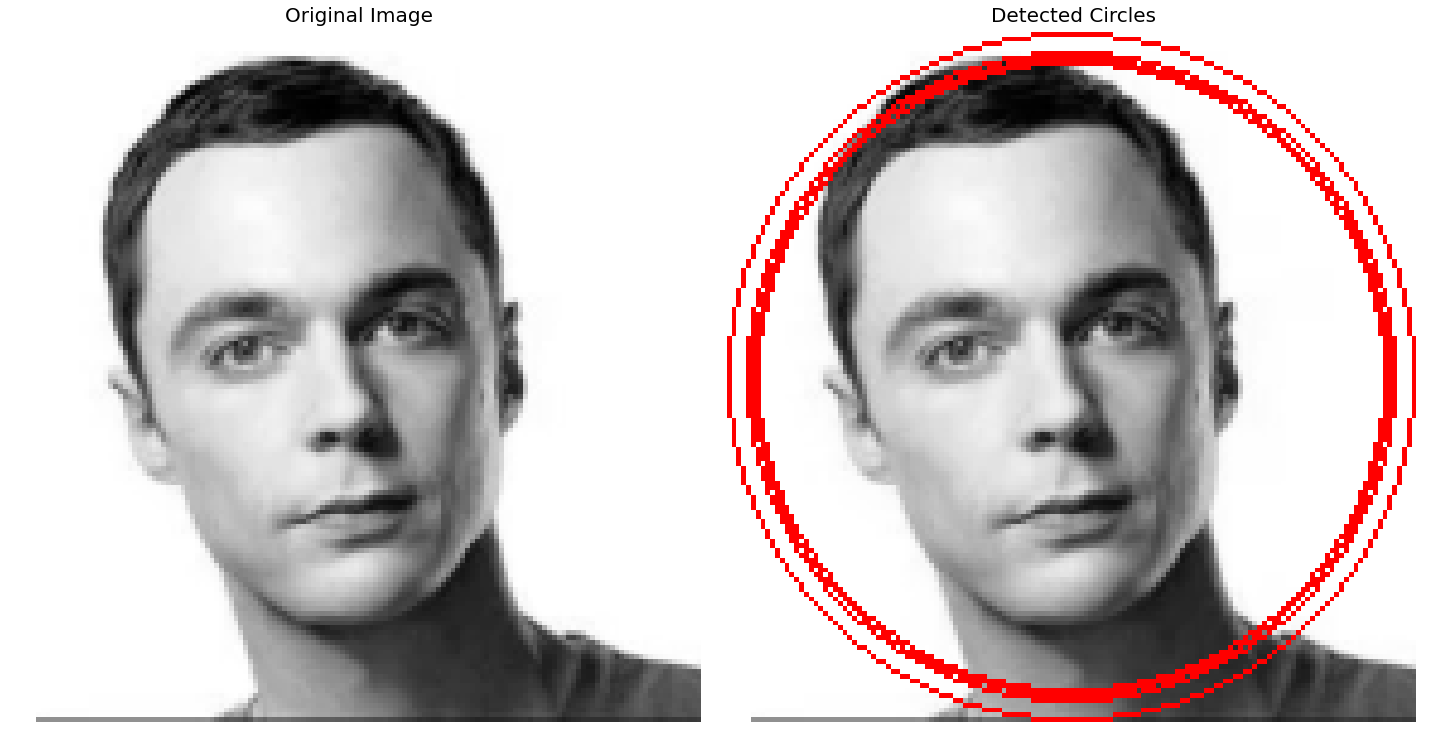

In [ ]:
image = rgb2gray(imread('/content/drive/MyDrive/PythImages/messi.jpg'))

# Classic straight-line Hough transform
h, theta, d = hough_line(image)

# Generating figure 1
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image', size=20)
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + h),
             extent=[10*np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
             cmap=cm.hot, aspect=1/1.5)
ax[1].set_title('Hough transform', size=20)
ax[1].set_xlabel('Angles (degrees)', size=20)
ax[1].set_ylabel('Distance (pixels)', size=20)
ax[1].axis('image')

ax[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, image.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, image.shape[1]))
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines', size=20)

hough_radii = np.arange(50, 100, 2)
hough_res = hough_circle(image, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=6)

image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (0.9, 0.2, 0.2)

ax[3].imshow(image, cmap=plt.cm.gray)
ax[3].set_axis_off()
ax[3].set_title('Detected Circles', size=20)

plt.tight_layout()
plt.show()

image = rgb2gray(imread('/content/drive/MyDrive/PythImages/morph_dst.png'))

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()
ax[0].set_title('Original Image', size=20)

hough_radii = np.arange(65, 75, 1)
hough_res = hough_circle(image, hough_radii)

# Select the most prominent 5 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4)

image = gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (1, 0, 0)

ax[1].imshow(image, cmap=plt.cm.gray)
ax[1].set_axis_off()
ax[1].set_title('Detected Circles', size=20)

plt.tight_layout()
plt.show()

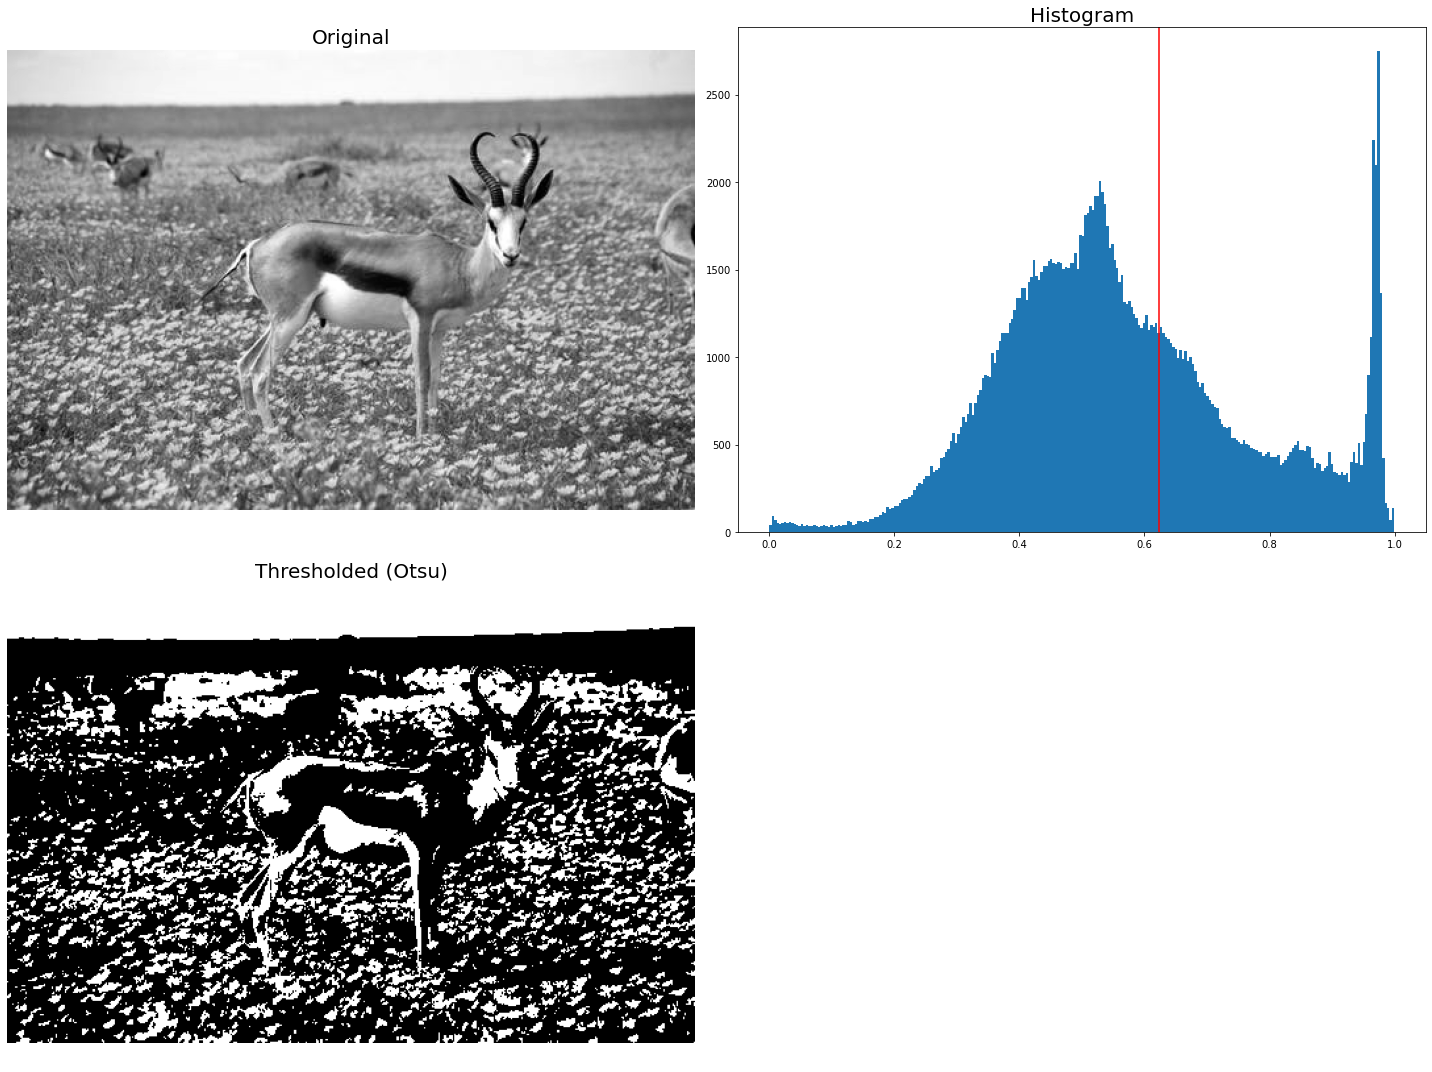

In [ ]:
image =  rgb2gray(imread('/content/drive/MyDrive/PythImages/antelops.jpeg')) #data.camera()
thresh = threshold_otsu(image)
binary = image > thresh

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 15))
ax = axes.ravel()
ax[0] = plt.subplot(2, 2, 1)
ax[1] = plt.subplot(2, 2, 2)
ax[2] = plt.subplot(2, 2, 3, sharex=ax[0], sharey=ax[0])
ax[3] = plt.subplot(2, 2, 4, sharex=ax[0], sharey=ax[0])

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original', size=20)
ax[0].axis('off')

ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram', size=20)
ax[1].axvline(thresh, color='r')

ax[2].imshow(binary, cmap=plt.cm.gray)
ax[2].set_title('Thresholded (Otsu)', size=20)
ax[2].axis('off')

ax[3].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
!pip install simpleitk
import SimpleITK as sitk
def show_image(img, title=None):
    nda = sitk.GetArrayViewFromImage(img)
    #nda = np.transpose(nda, (1, 2, 0))
    #print(nda.shape)
    plt.imshow(nda, cmap='gray')   
    plt.axis('off')
    if(title):
        plt.title(title, size=20)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 52.8 MB 101 kB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  """Entry point for launching an IPython kernel.


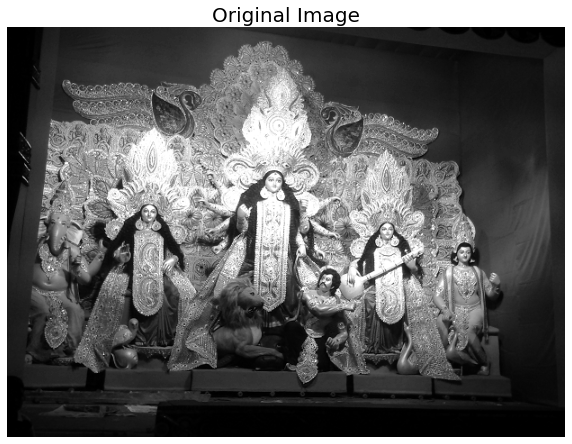

In [ ]:
img = 255*rgb2gray(imread('/content/drive/MyDrive/PythImages/madurga.png'))
#img = np.transpose(img, (2, 0, 1))
img_T1 = sitk.GetImageFromArray(img) 
img_T1_255 = sitk.Cast(sitk.RescaleIntensity(img_T1), sitk.sitkUInt8)
#print(img_T1.GetSize())
#nda = sitk.GetArrayViewFromImage(img_T1)
#print(nda.shape, nda.ndim)
plt.figure(figsize=(10,10))
show_image(img_T1, "Original Image")

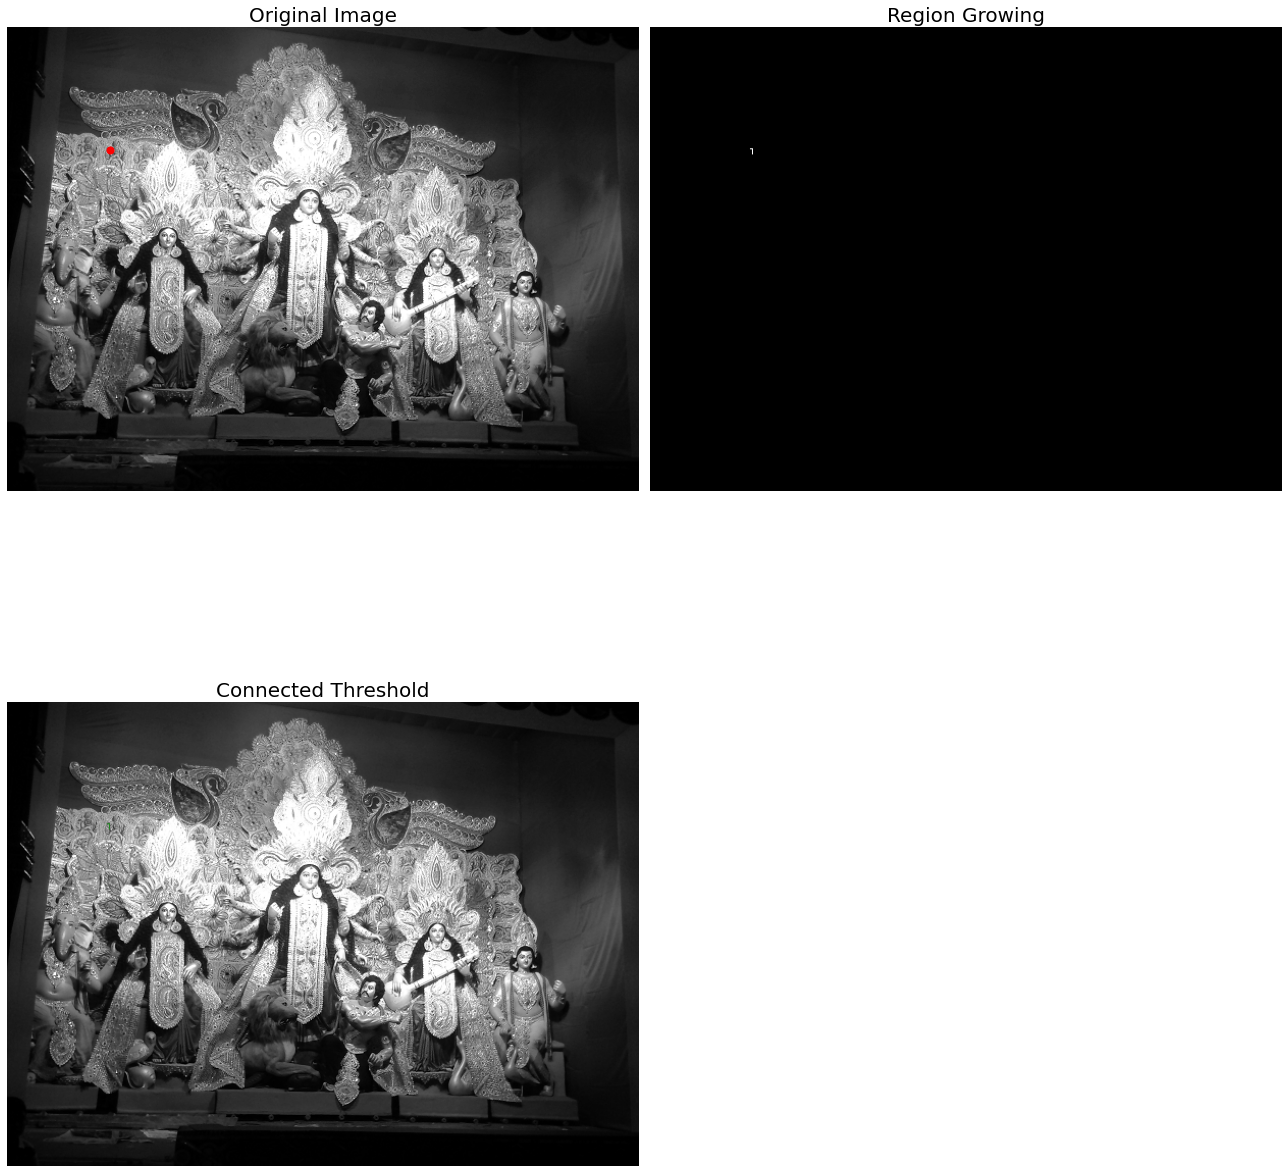

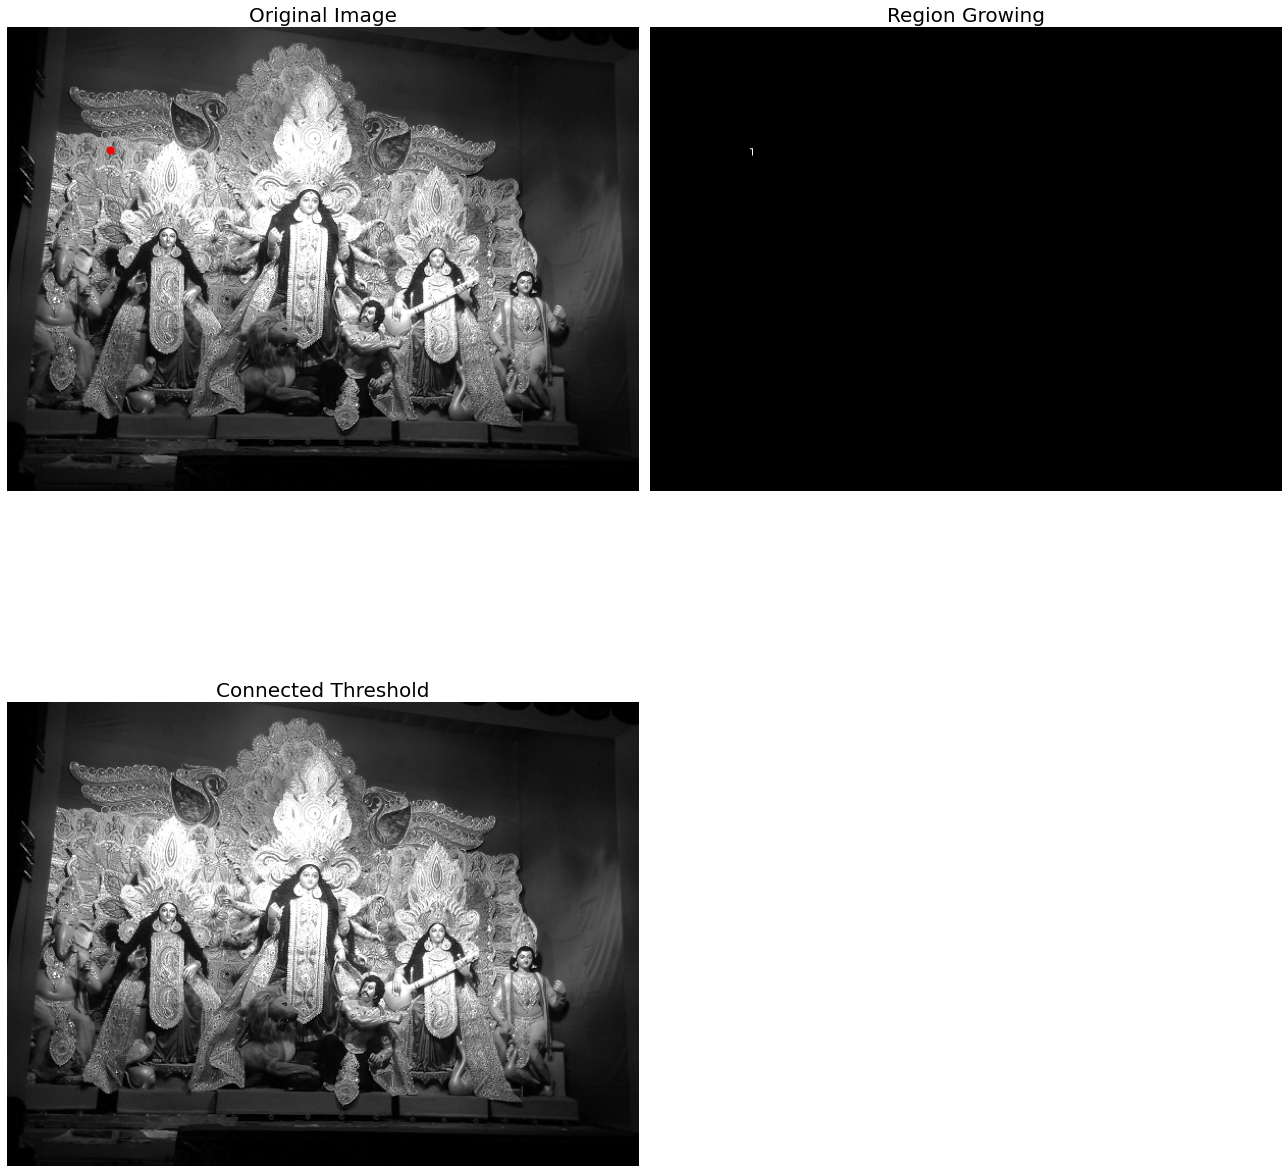

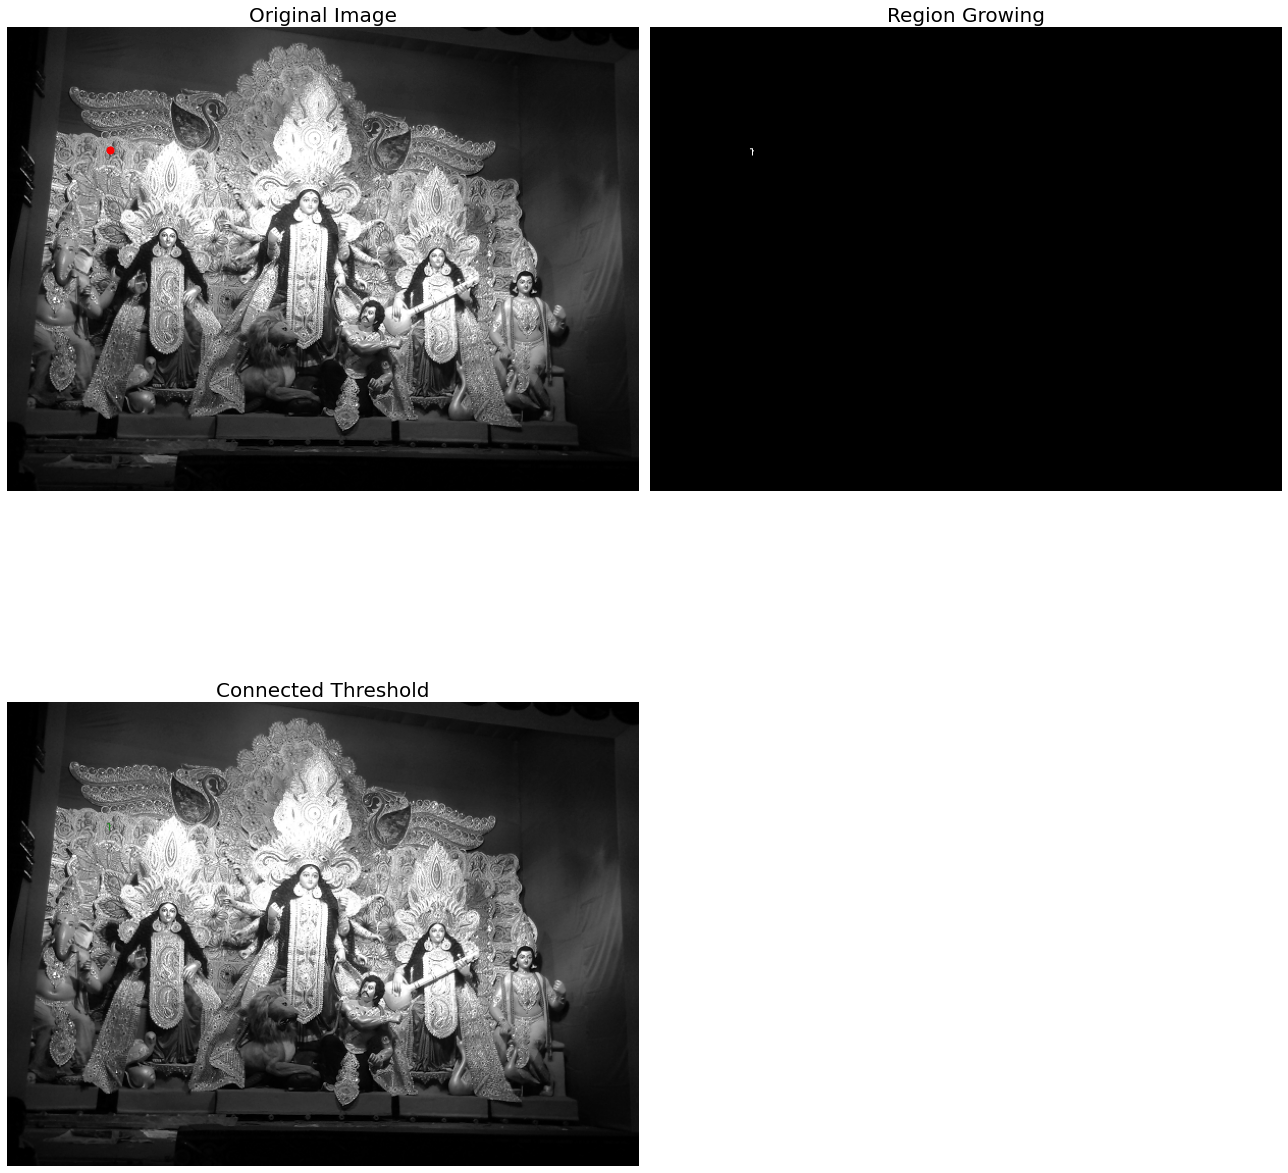

In [ ]:
seed = (100,120)
for upper in [80, 85, 90]:
    plt.figure(figsize=(18,20))
    plt.subplot(221)
    show_image(img_T1, "Original Image")
    plt.scatter(seed[0], seed[1], color='red', s=50)
    plt.subplot(222)
    seg = sitk.ConnectedThreshold(img_T1, seedList=[seed], lower=40, upper=upper)
    show_image(seg, "Region Growing")
    plt.subplot(223)
    show_image(sitk.LabelOverlay(img_T1_255, seg), "Connected Threshold")
    plt.axis('off')
    plt.tight_layout()
    plt.show()

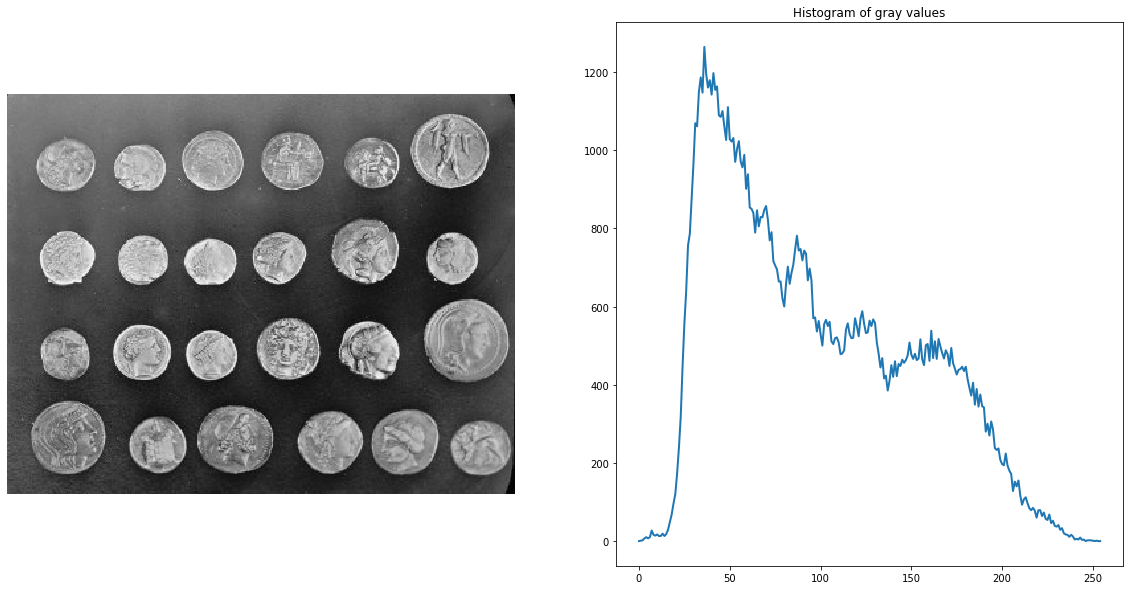

In [ ]:
coins = data.coins()
#print(np.max(coins), np.min(coins), np.mean(coins))
hist = np.histogram(coins, bins=np.arange(0, 256))
#print(hist)

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].axis('off')
axes[1].plot(hist[1][:-1], hist[0], lw=2)
axes[1].set_title('Histogram of gray values')
plt.show()

In [ ]:
edges = canny(coins, sigma=2)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(edges, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Canny detector')
ax.axis('off')
plt.show()

In [ ]:
from scipy import ndimage as ndi

fill_coins = ndi.binary_fill_holes(edges)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(fill_coins, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Filling the holes')
ax.axis('off')
plt.show()

In [ ]:
from skimage import morphology

coins_cleaned = morphology.remove_small_objects(fill_coins, 21)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(coins_cleaned, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Removing small objects')
ax.axis('off')
plt.show()

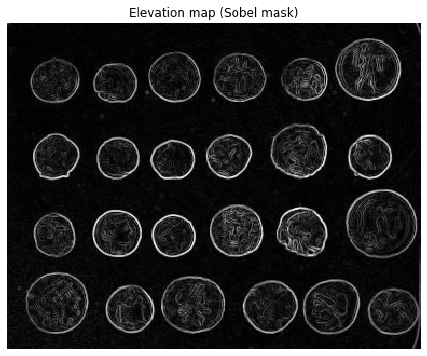

(303, 384)


In [ ]:
from skimage.filters import sobel

elevation_map = sobel(coins)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(elevation_map, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Elevation map (Sobel mask)')
ax.axis('off')
plt.show()
print(elevation_map.shape)

2 0


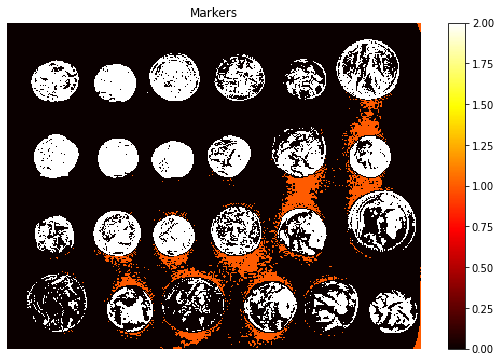

In [ ]:
markers = np.zeros_like(coins)
markers[coins < 30] = 1
markers[coins > 150] = 2
print(np.max(markers), np.min(markers))

fig, ax = plt.subplots(figsize=(10, 6))
a = ax.imshow(markers, cmap=plt.cm.hot, interpolation='nearest')
plt.colorbar(a)
ax.set_title('Markers')
ax.axis('off')
plt.show()

/usr/local/lib/python3.7/dist-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


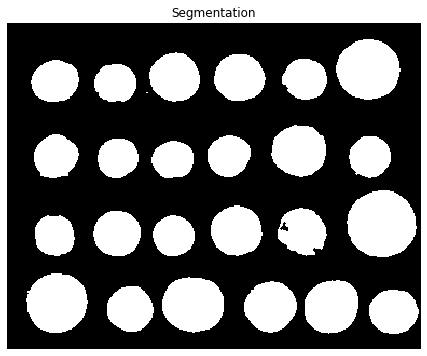

In [ ]:
segmentation = morphology.watershed(elevation_map, markers)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(segmentation, cmap=plt.cm.gray, interpolation='nearest')
ax.set_title('Segmentation')
ax.axis('off')
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: The new recommended value for bg_label is 0. Until version 0.19, the default bg_label value is -1. From version 0.19, the bg_label default value will be 0. To avoid this warning, please explicitly set bg_label value.
  


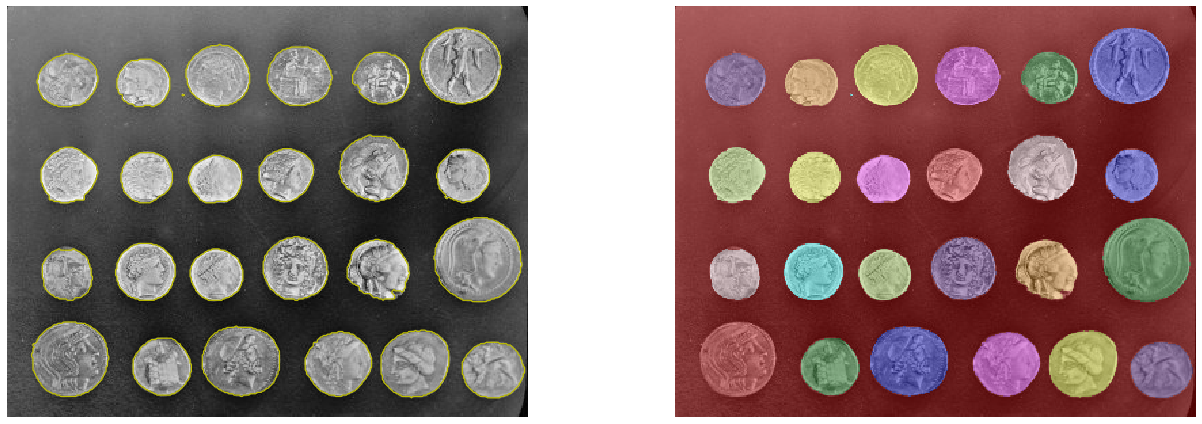

In [ ]:
from skimage.color import label2rgb

segmentation = ndi.binary_fill_holes(segmentation - 1)
labeled_coins, _ = ndi.label(segmentation)
print(np.unique(labeled_coins))
image_label_overlay = label2rgb(labeled_coins, image=coins)

fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axes[0].imshow(coins, cmap=plt.cm.gray, interpolation='nearest')
axes[0].contour(segmentation, [0.5], linewidths=1.2, colors='y')
axes[1].imshow(image_label_overlay, interpolation='nearest')

for a in axes:
    a.axis('off')

plt.tight_layout()

plt.show()